# Claude API를 이용해 멀티모달 호출하기

Claude 3 모델들은 API에서 이미지 입력을 지원합니다.

In [ ]:
!pip install anthropic IPython

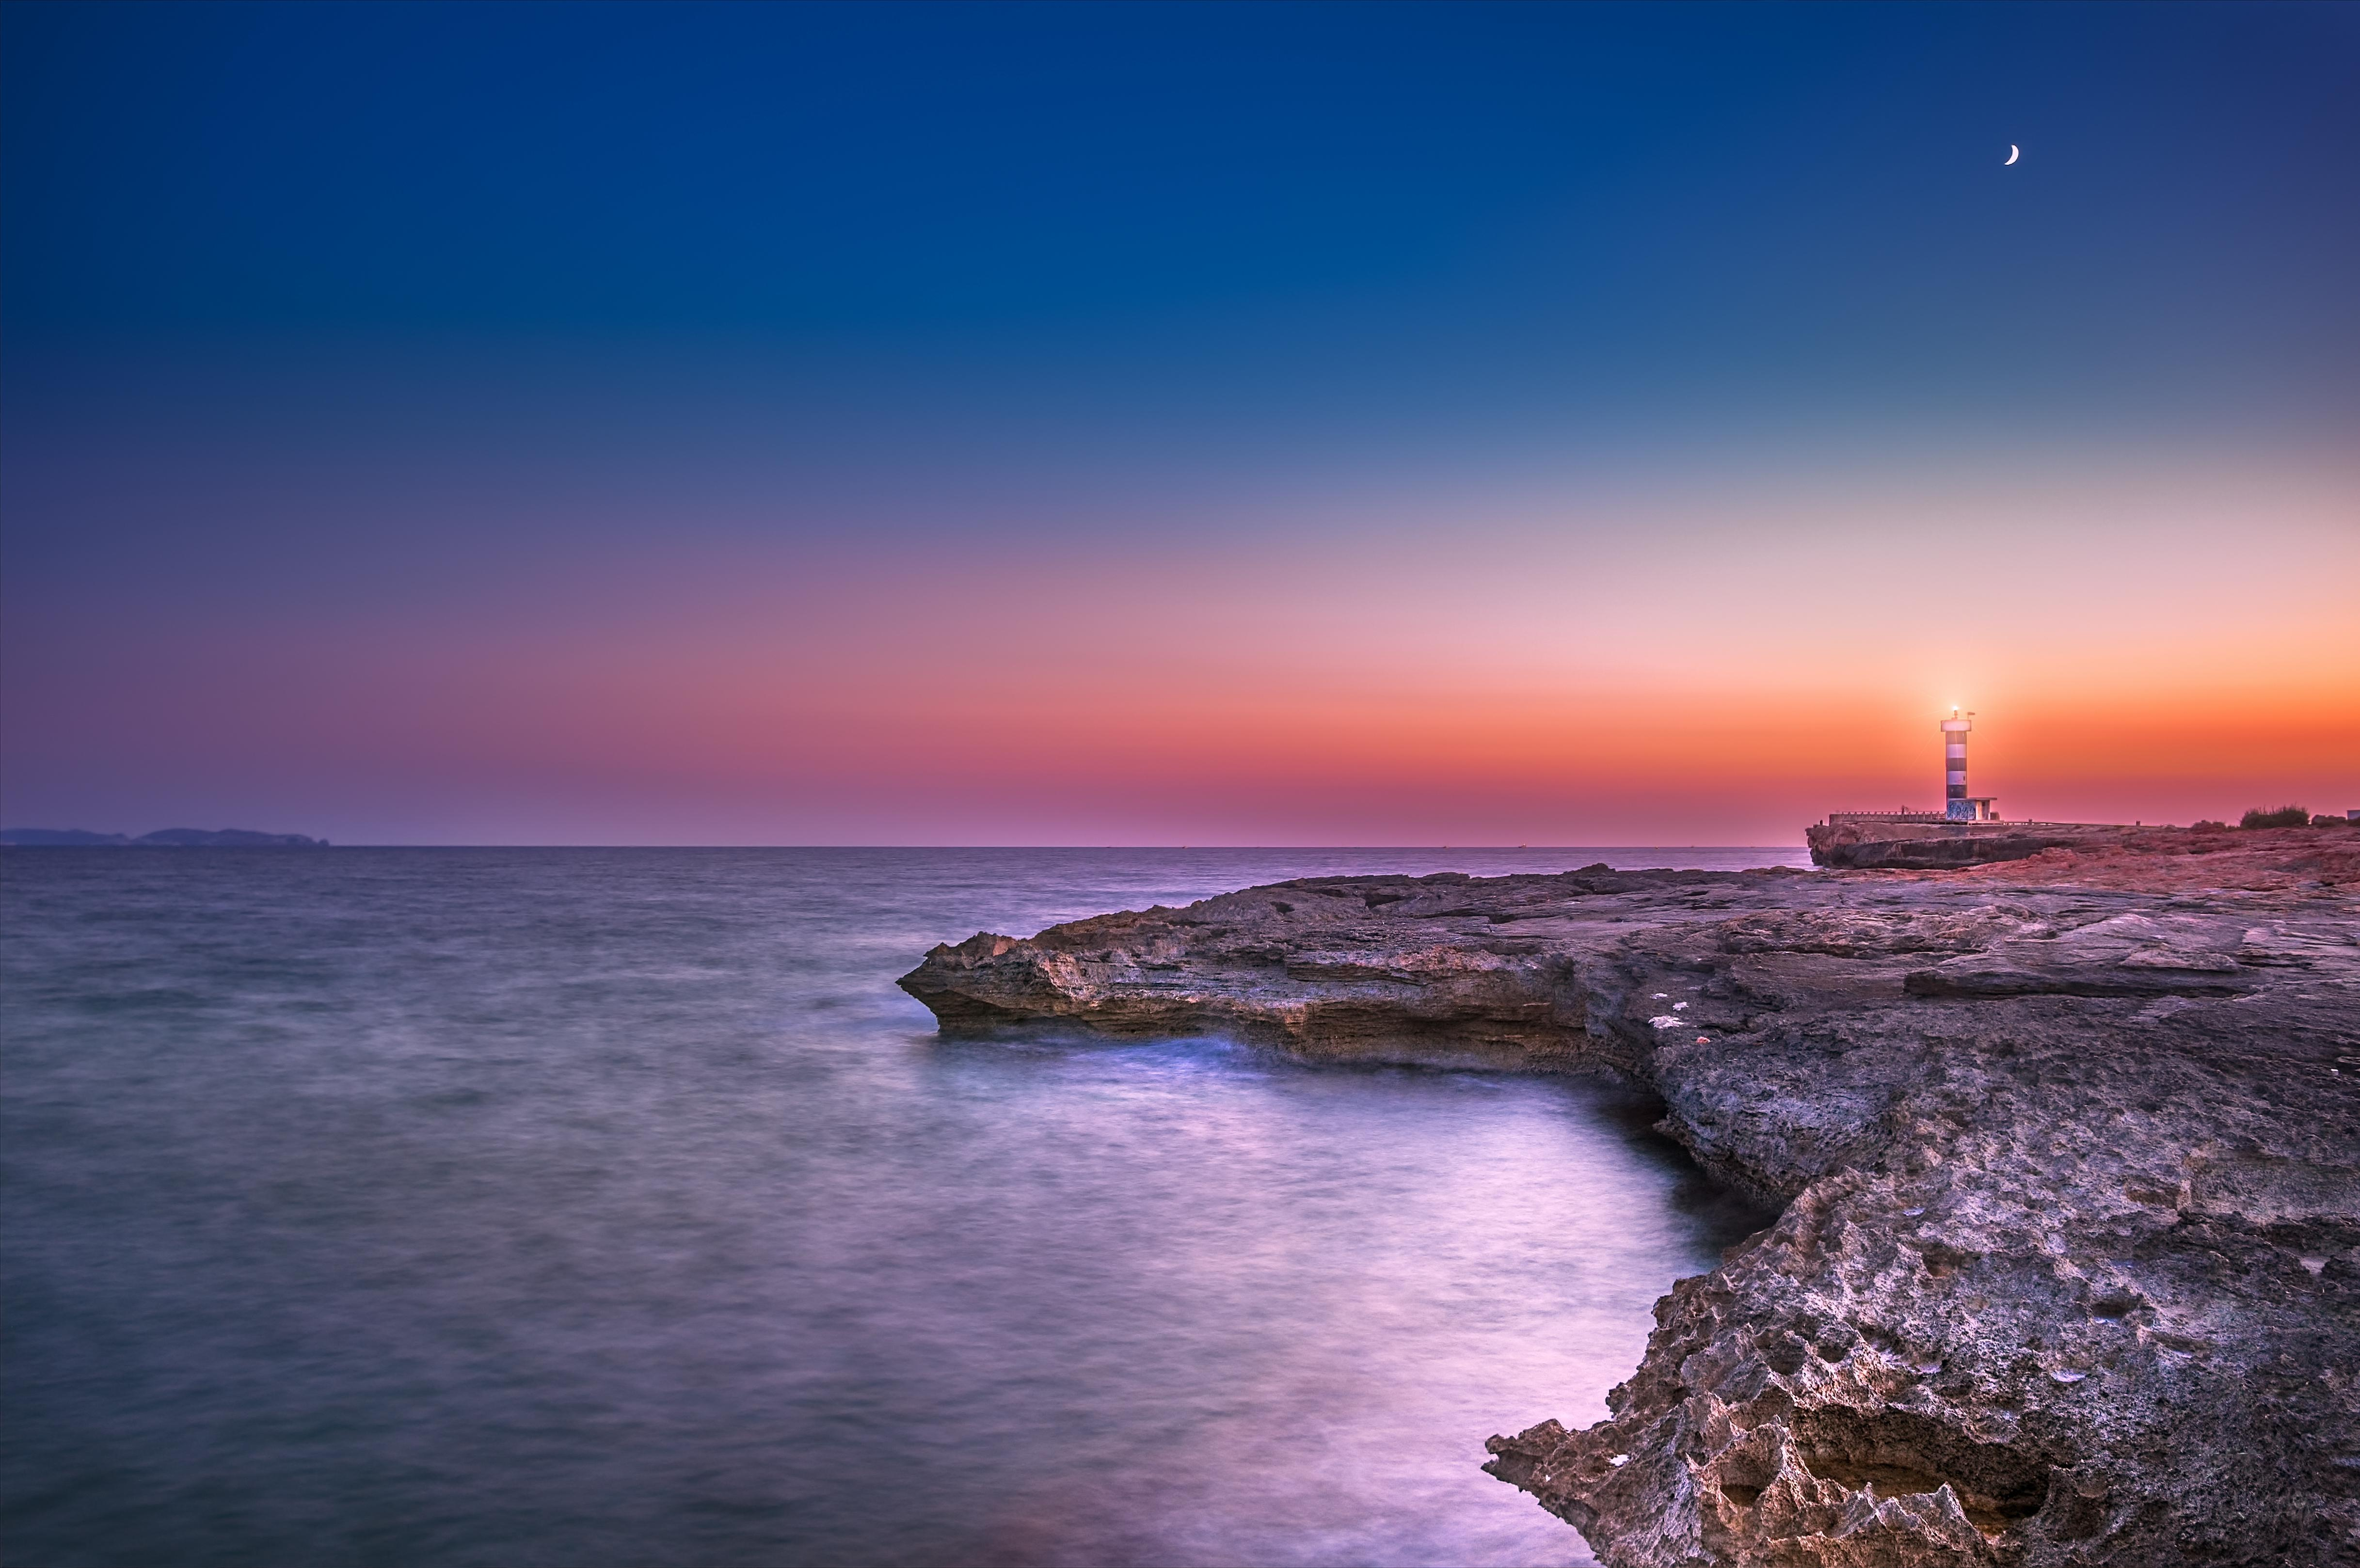

In [1]:
from IPython.display import Image
Image(filename='./images/sunset.jpeg', width=640) 

In [2]:
import base64
from anthropic import Anthropic

In [3]:
client = Anthropic()
MODEL_NAME = "claude-3-opus-20240229"

with open("./images/sunset.jpeg", "rb") as image_file:
    binary_data = image_file.read()
    base_64_encoded_data = base64.b64encode(binary_data)
    base64_string = base_64_encoded_data.decode('utf-8')


message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": base64_string}},
            {"type": "text", "text": "이 이미지를 설명해줘"}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

이 이미지는 아름다운 일몰 풍경을 담고 있습니다. 앞쪽 바위 해안에 파도가 부서지고, 수평선 너머로 노란 빛의 일몰이 물들이고 있습니다. 멀리 등대가 보이는데, 이는 아마도 배들을 안전하게 인도하는 역할을 하는 것 같습니다. 전체적으로 고요하면서도 장엄한 분위기를 자아내는 풍경입니다. 자연의 아름다움과 평화로움이 잘 표현된 인상적인 사진이라고 할 수 있겠네요.


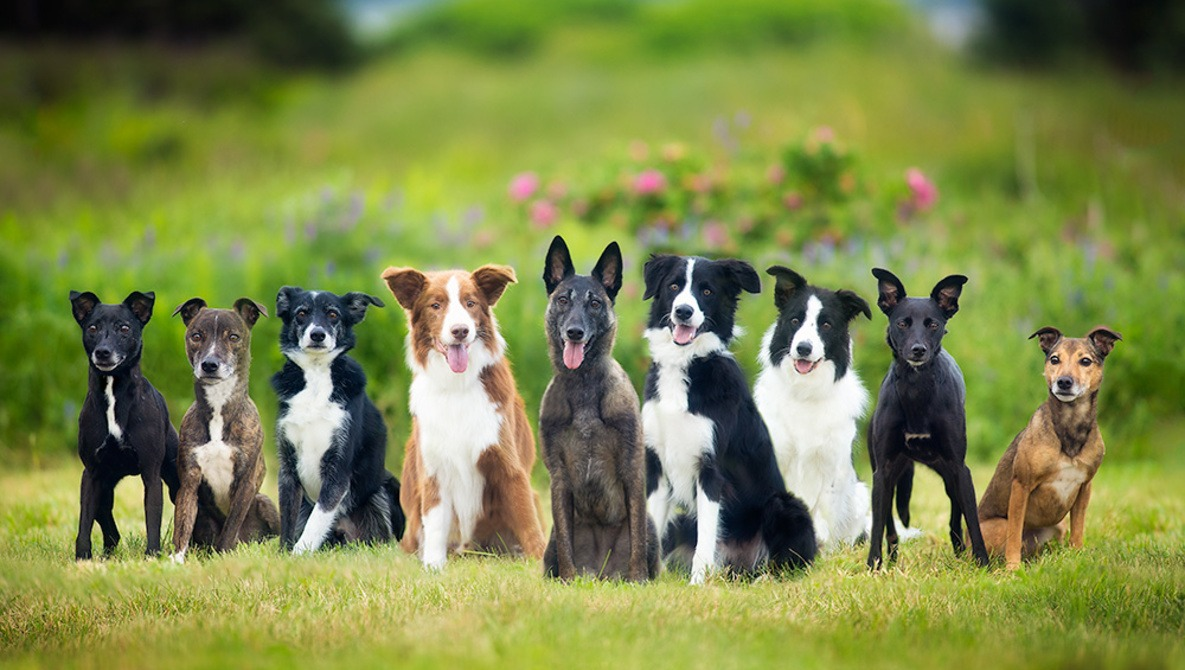

In [11]:
Image(filename='./images/best_practices/nine_dogs.jpg', width=640)

In [12]:
def get_base64_encoded_image(image_path):
    with open(image_path, "rb") as image_file:
        binary_data = image_file.read()
        base_64_encoded_data = base64.b64encode(binary_data)
        base64_string = base_64_encoded_data.decode('utf-8')
        return base64_string

In [13]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg",
                                         "data": get_base64_encoded_image("./images/best_practices/nine_dogs.jpg")}},
            {"type": "text", "text": "이 사진에 개가 몇 마리있어?"}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list,
    temperature=0
)
print(response.content[0].text)

이 사진에는 총 10마리의 개들이 보입니다. 앞줄에는 보더콜리, 잭 러셀 테리어, 그레이하운드 등 다양한 품종의 개들이 앉아 있고, 뒷줄에는 검은색과 갈색 개들이 서 있습니다. 개들 뒤로는 초록색 잔디밭과 분홍색 꽃들이 피어 있어 화사한 느낌을 줍니다. 개들의 귀엽고 다양한 표정이 인상적인 사진입니다.


## URL로 이미 분석하기

If you only have a URL of the image you can still pass it to Claude with just a few short lines of code.

In [14]:
IMAGE_URL = "https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Machu_Picchu%2C_Peru_%282018%29.jpg/2560px-Machu_Picchu%2C_Peru_%282018%29.jpg"
Image(url=IMAGE_URL, width=640)


In [15]:
import httpx

IMAGE_DATA = base64.b64encode(httpx.get(IMAGE_URL).content).decode("utf-8")

message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/jpeg", "data": IMAGE_DATA}},
            {"type": "text", "text": "이 사진을 두 문장으로 설명해줘"}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

이 사진은 페루의 마추픽추 유적지를 보여주고 있습니다. 웅장한 안데스 산맥을 배경으로 잉카 문명의 석조 건축물들이 계단식으로 배치되어 있어 마치 하늘로 통하는 듯한 장관을 연출하고 있습니다.


# Visual Prompting

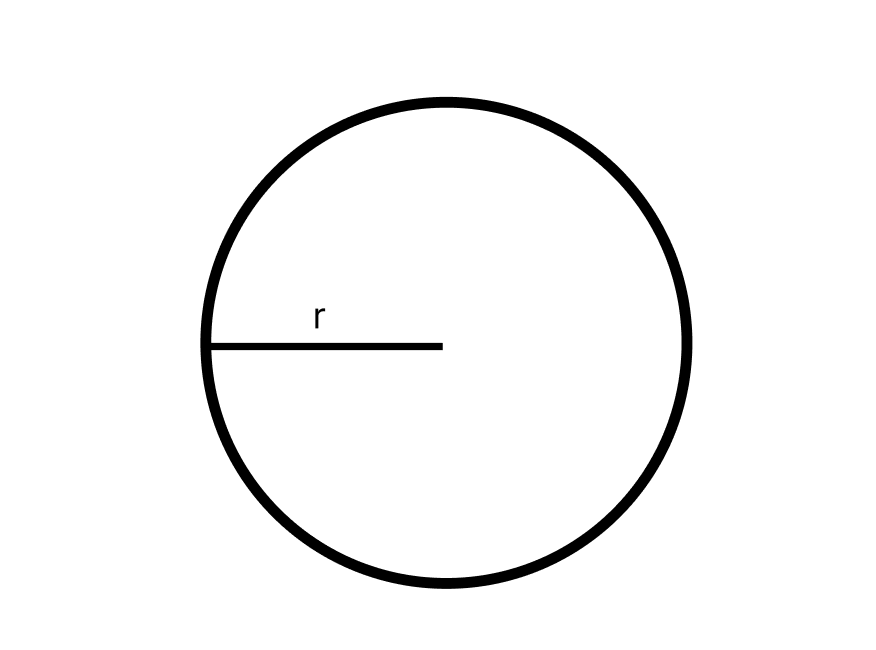

In [16]:
Image(filename='./images/best_practices/circle.png', width=640) 

In [17]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64", "media_type": "image/png",
                                         "data": get_base64_encoded_image("./images/best_practices/circle.png")}},
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

The image shows a simple black circle outline on a white background. Inside the circle, there is a straight black horizontal line segment that does not touch the edges of the circle. The line segment appears to be centered within the circle.


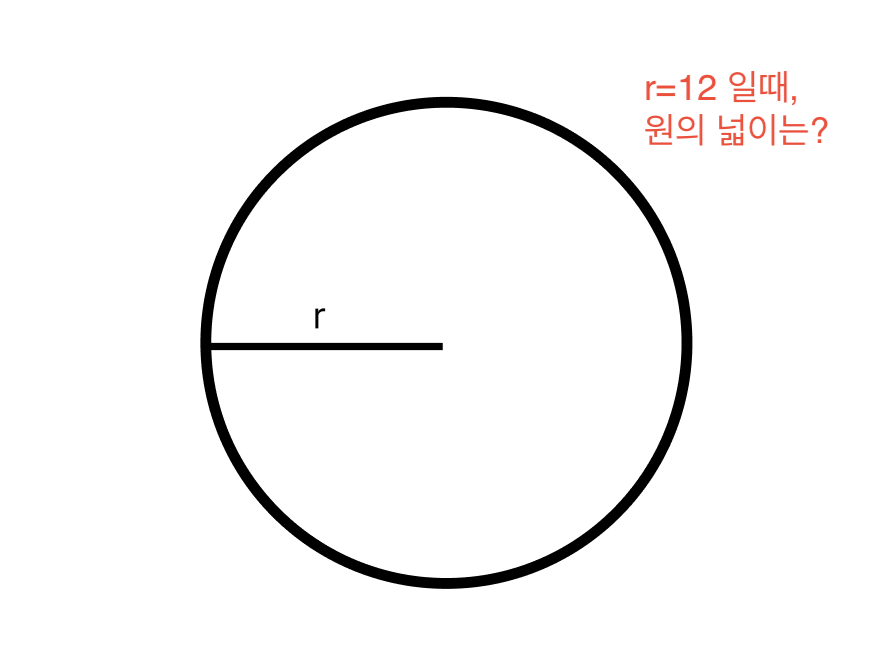

In [18]:
Image(filename='./images/best_practices/labeled_circle.png', width=640) 

In [19]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64",
                                         "media_type": "image/png",
                                         "data": get_base64_encoded_image("./images/best_practices/labeled_circle.png")}},
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

원의 반지름은 12일때, 원의 넓이를 구하는 문제입니다. 원의 넓이 공식은 πr^2 이므로, 12 x 12 x 3.14 = 452.16 입니다. 따라서 주어진 원의 넓이는 약 452.16 입니다.


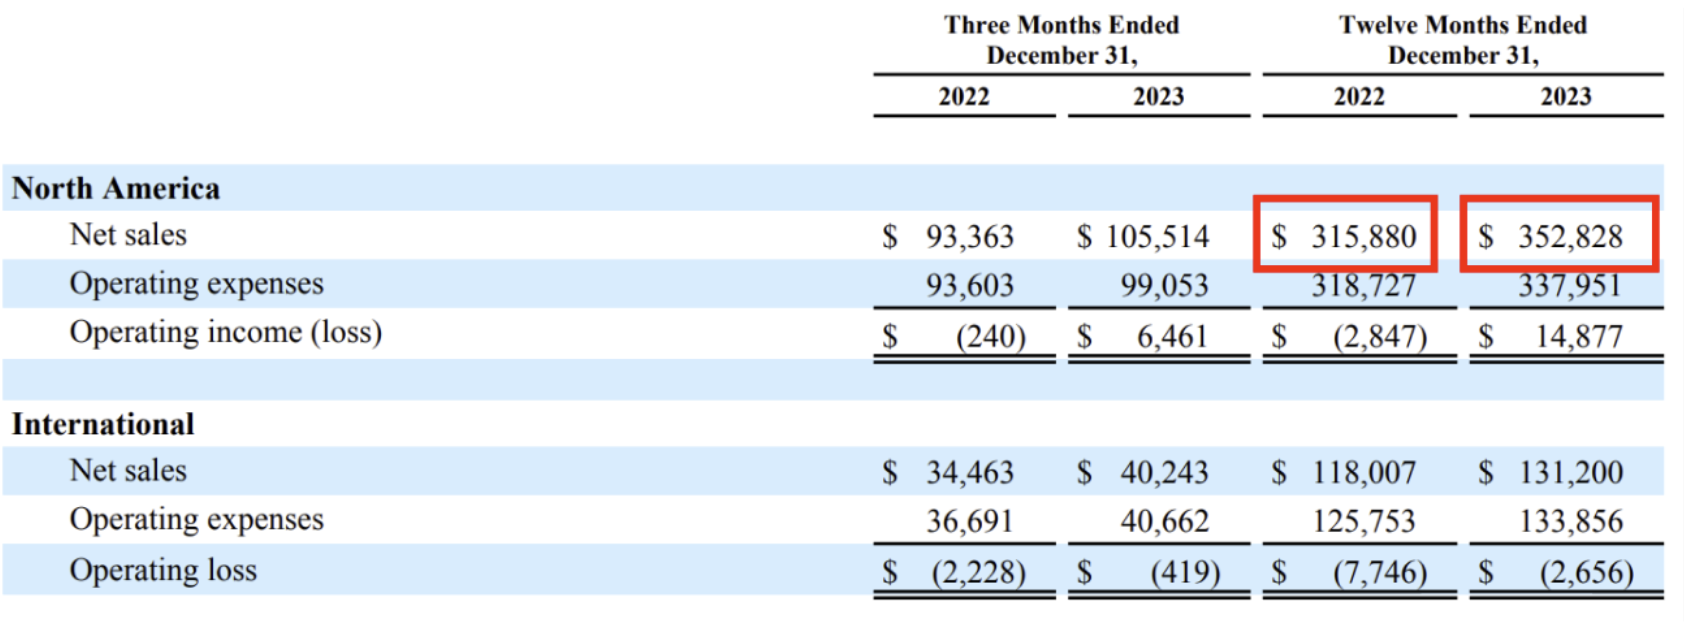

In [20]:
Image(filename='./images/best_practices/table.png', width=640) 

In [22]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64",
                                         "media_type": "image/png",
                                         "data": get_base64_encoded_image("./images/best_practices/table.png")}},
            {"type": "text", "text": "이 빨간색 박스친 두 숫자의 차는 뭐야?"}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

레드 박스로 표시된 두 숫자는 2022년과 2023년 12개월 동안 North America의 Net sales를 나타냅니다. 2022년의 $315,880와 2023년의 $352,828의 차이는 $36,948입니다.


## 이미지의 텍스트 인식

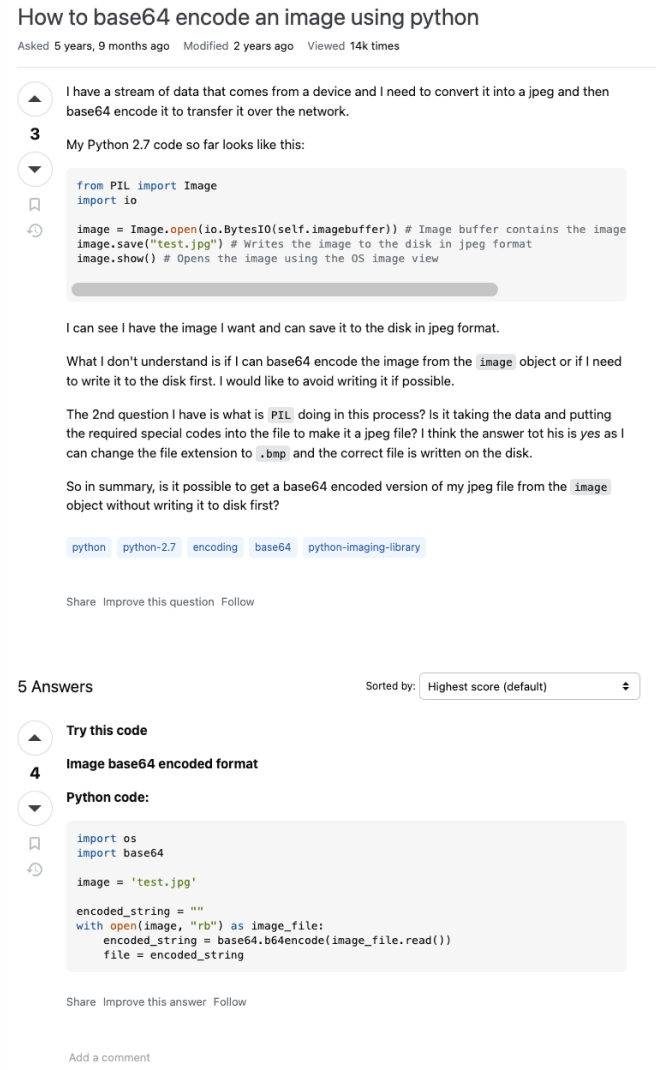

In [23]:
Image(filename='./images/transcribe/stack_overflow.png', width=640) 

In [24]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64",
                                         "media_type": "image/png",
                                         "data": get_base64_encoded_image("./images/transcribe/stack_overflow.png")}},
            {"type": "text", "text": "답변의 코드를 인식해서 코드만 출력해"}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

import os
import base64

image = 'test.jpg'

encoded_string = ""
with open(image, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())
file = encoded_string


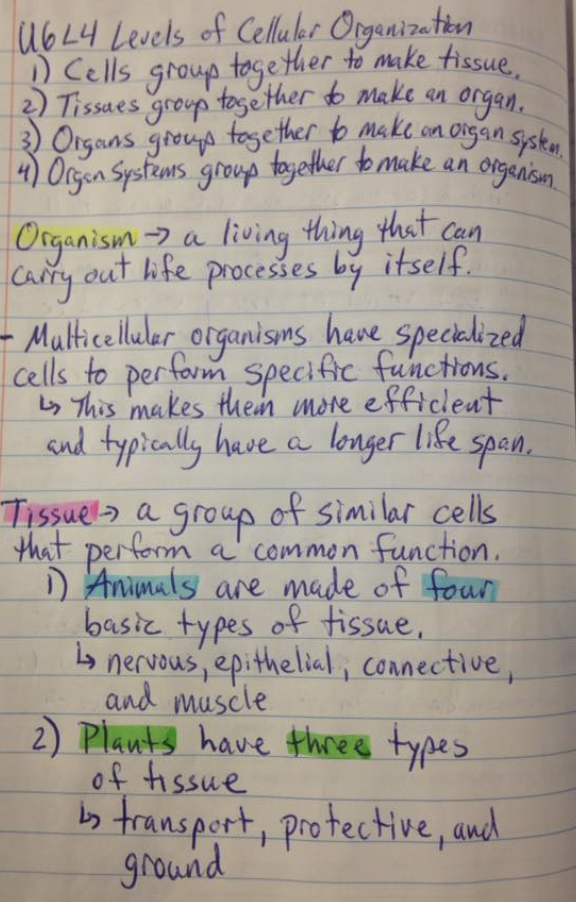

In [25]:
Image(filename='./images/transcribe/school_notes.png', width=640) 

In [26]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64",
                                         "media_type": "image/png",
                                         "data": get_base64_encoded_image("./images/transcribe/school_notes.png")}},
            {"type": "text", "text": "이 텍스트를 인식하고 텍스트만 출력하고 다른 것은 출력하지마"}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

1) Cells group together to make tissue.
2) Tissues group together to make an organ,
3) Organs group together to make an organ system
4) Organ systems group together to make an organism

Organism -> a living thing that can
carry out life processes by itself.

- Multicellular organisms have specialized
cells to perform specific functions.
* This makes them more efficient
and typically have a longer like span.

Tissue = a group of similar cells
that perform a common function.
1) Animals are made of four
basic types of tissue.
b nervous, epithelial, connective,
and muscle
2) Plants have three types
of tissue
b transport, protective, and
ground


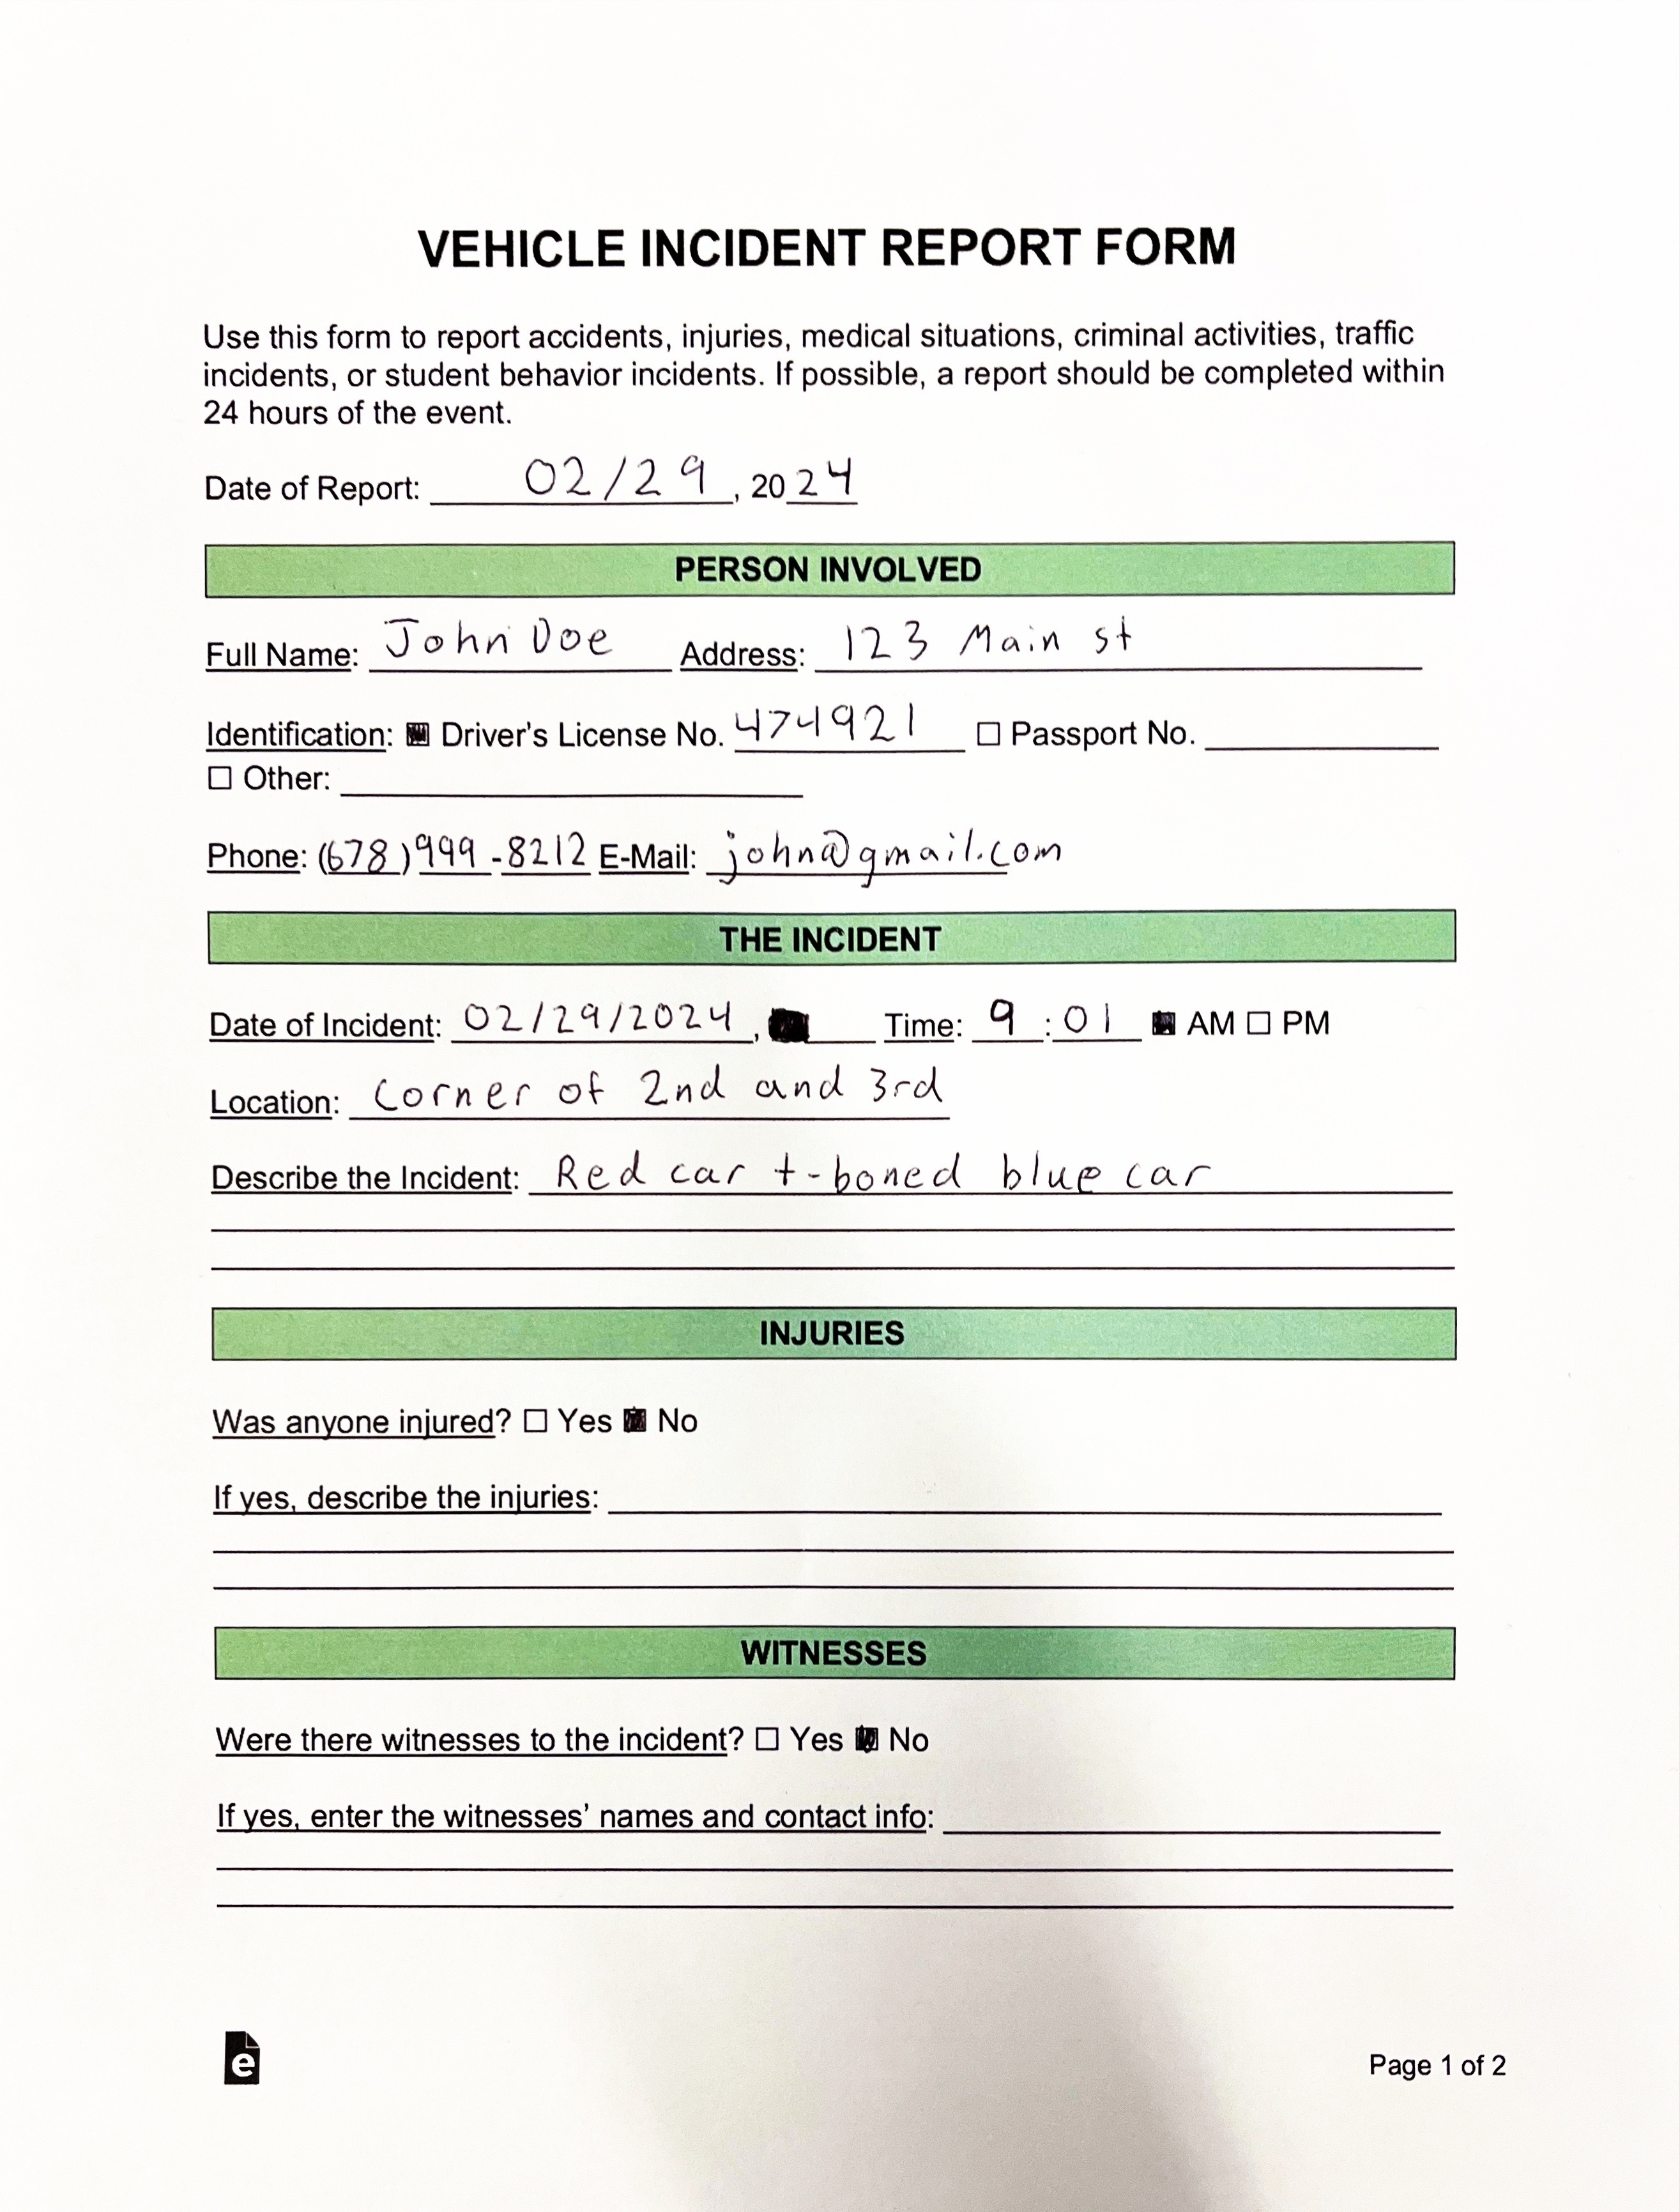

In [27]:
Image(filename='./images/transcribe/vehicle_form.jpg', width=640) 

In [28]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64",
                                         "media_type": "image/jpeg",
                                         "data": get_base64_encoded_image("./images/transcribe/vehicle_form.jpg")}},
            {"type": "text", "text": "이 폼을 정확히 인식해서 텍스트로 출력해줘."}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

VEHICLE INCIDENT REPORT FORM

Use this form to report accidents, injuries, medical situations, criminal activities, traffic
incidents, or student behavior incidents. If possible, a report should be completed within
24 hours of the event.

Date of Report: 02/29, 2024

PERSON INVOLVED

Full Name: John Doe Address: 123 Main St

Identification: ■ Driver's License No. 474921 ☐ Passport No. ____________
☐ Other: ______________________

Phone: (678) 999-8212 E-Mail: john@gmail.com

THE INCIDENT

Date of Incident: 02/29/2024 , ■  Time:  9 : 01  ■ AM ☐ PM

Location: Corner of 2nd and 3rd

Describe the Incident: Red car t-boned blue car

INJURIES

Was anyone injured? ☐ Yes ■ No

If yes, describe the injuries: _____________________________________________
____________________________________________________________________
____________________________________________________________________

WITNESSES

Were there witnesses to the incident? ☐ Yes ■ No

If yes, enter the witnesses' names and contac

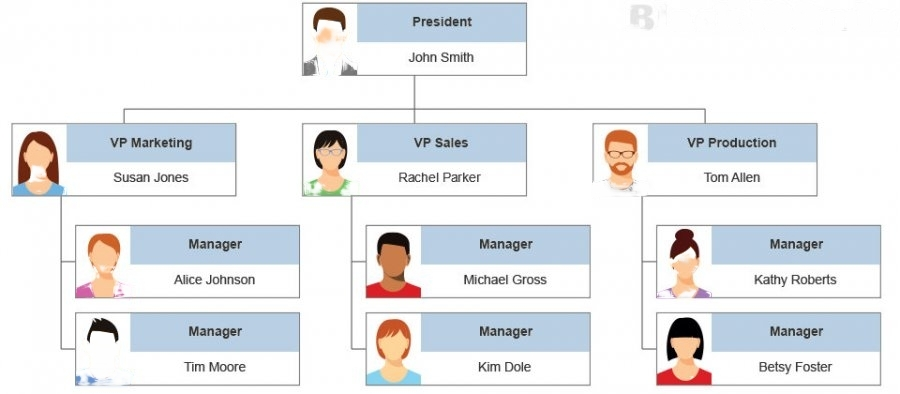

In [29]:
Image(filename='./images/transcribe/org_chart.jpeg', width=640) 

In [30]:
message_list = [
    {
        "role": 'user',
        "content": [
            {"type": "image", "source": {"type": "base64",
                                         "media_type": "image/jpeg",
                                         "data": get_base64_encoded_image("./images/transcribe/org_chart.jpeg")}},
            {"type": "text",
             "text": "이 조직도를 누가 누구에게 보고하는지를 나타내는 JSON으로 변환하하고 JSON만 출력하고 다른 것은 출력하지 마"}
        ]
    }
]

response = client.messages.create(
    model=MODEL_NAME,
    max_tokens=2048,
    messages=message_list
)
print(response.content[0].text)

{
  "John Smith": {
    "Susan Jones": {
      "Alice Johnson": {},
      "Tim Moore": {}
    },
    "Rachel Parker": {
      "Michael Gross": {},
      "Kim Dole": {}
    },
    "Tom Allen": {
      "Kathy Roberts": {},
      "Betsy Foster": {}
    }
  }
}
